The objective of this project is to develop a machine learning model and deploy it as a user-friendly web application that predicts the resale prices of flats in Singapore. This predictive model will be based on historical data of resale flat transactions, and it aims to assist both potential buyers and sellers in estimating the resale value of a flat.

In [1]:
# Packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt

#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

KeyboardInterrupt: 

In [ ]:
# reading the 1900 to 1999
df = pd.read_csv("C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPrice1990.csv")
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [ ]:
# reading the 2000 to 2012
df1 = pd.read_csv("C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPrices2000.csv")
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [ ]:
# reading the 2012 to 2014
df2 = pd.read_csv("C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPricesMar2012toDec2014.csv")
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [ ]:
# reading the 2015 to 2016
df3 = pd.read_csv("C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPrices2015toDec2016.csv")
df3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [ ]:
# reading the 2017 to 2024
df4 = pd.read_csv("C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\Resaleflatprices2017.csv")
df4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0


In [ ]:
# List of file names to merge
files = [
    r"C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPrice1990.csv",
    r"C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPrices2000.csv",
   r"C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPricesMar2012toDec2014.csv",
    r"C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPrices2015toDec2016.csv",
    r"C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\Resaleflatprices2017.csv"
]

In [ ]:
merged_data = pd.DataFrame()
dataframes = []
# Loop through the list of file names and read their data into DataFrames
for file_name in files:
    df = pd.read_csv(file_name)
    dataframes.append(df)

# Concatenate the DataFrames into one
merged_data = pd.concat(dataframes, ignore_index=True)

# Save the merged data to a new CSV file
merged_data.to_csv('merged_file.csv', index=False)

In [ ]:
merged_data.to_csv('Singapore Resale Flat Prices.csv', index=False)

In [ ]:
df=pd.read_csv('Singapore Resale Flat Prices.csv')    
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
921673,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62.0
921674,2024-03,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,Maisonette,1988,830000.0,63.0
921675,2024-03,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,820000.0,63.0
921676,2024-03,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,860000.0,63.0


Observation:
- month column is having month and year, it has to be splitted
- Remaining lease column has NaN values
- Block and Street Name should be merged    

In [ ]:
# Creating a new column "address"
df["address"]= df["block"]+" "+df["street_name"]

In [ ]:
#droping the "street_name" and "block"
df= df.drop(columns=["block","street_name"])

In [ ]:
# for month
df["month"] = pd.to_datetime(df["month"], format="%Y-%m")

In [ ]:
#spliting the month column to "Year", "month", "day"
df["year"]= df["month"].dt.year
df["month"]= df["month"].dt.month

In [ ]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,address,year
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,309 ANG MO KIO AVE 1,1990
1,1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,309 ANG MO KIO AVE 1,1990
2,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,309 ANG MO KIO AVE 1,1990
3,1,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,309 ANG MO KIO AVE 1,1990
4,1,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,216 ANG MO KIO AVE 1,1990


In [ ]:
df.tail()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,address,year
921673,3,YISHUN,EXECUTIVE,10 TO 12,146.0,Apartment,1987,851888.0,62.0,791 YISHUN AVE 2,2024
921674,3,YISHUN,EXECUTIVE,07 TO 09,146.0,Maisonette,1988,830000.0,63.0,392 YISHUN AVE 6,2024
921675,3,YISHUN,EXECUTIVE,10 TO 12,146.0,Maisonette,1988,820000.0,63.0,326 YISHUN RING RD,2024
921676,3,YISHUN,EXECUTIVE,04 TO 06,146.0,Maisonette,1988,860000.0,63.0,360 YISHUN RING RD,2024
921677,3,YISHUN,EXECUTIVE,07 TO 09,142.0,Apartment,1987,780000.0,62.0,606 YISHUN ST 61,2024


In [ ]:
# Convert columns to datetime if they are not already
#df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date'])

# Calculate the remaining lease by subtracting the lease commence date from the year
#df['remaining_lease'] = df['year'].dt.year - df['lease_commence_date'].dt.year

# Fill NaN values in remaining lease with the calculated values
df['remaining_lease'].fillna(0, inplace=True)

# Convert the remaining lease column to integer type
df['remaining_lease'] = df['remaining_lease'].astype(int)


In [ ]:
# check for missing values:
df.isnull().sum()

month                  0
town                   0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
address                0
year                   0
dtype: int64

In [ ]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,address,year
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,0,309 ANG MO KIO AVE 1,1990
1,1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,0,309 ANG MO KIO AVE 1,1990
2,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,0,309 ANG MO KIO AVE 1,1990
3,1,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,0,309 ANG MO KIO AVE 1,1990
4,1,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,0,216 ANG MO KIO AVE 1,1990


In [ ]:
df.tail()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,address,year
921673,3,YISHUN,EXECUTIVE,10 TO 12,146.0,Apartment,1987,851888.0,62,791 YISHUN AVE 2,2024
921674,3,YISHUN,EXECUTIVE,07 TO 09,146.0,Maisonette,1988,830000.0,63,392 YISHUN AVE 6,2024
921675,3,YISHUN,EXECUTIVE,10 TO 12,146.0,Maisonette,1988,820000.0,63,326 YISHUN RING RD,2024
921676,3,YISHUN,EXECUTIVE,04 TO 06,146.0,Maisonette,1988,860000.0,63,360 YISHUN RING RD,2024
921677,3,YISHUN,EXECUTIVE,07 TO 09,142.0,Apartment,1987,780000.0,62,606 YISHUN ST 61,2024


In [ ]:
#checking duplicate values 
df.nunique()

month                    12
town                     27
flat_type                 8
storey_range             25
floor_area_sqm          211
flat_model               34
lease_commence_date      56
resale_price           9430
remaining_lease          58
address                9828
year                     35
dtype: int64

In [ ]:
df.columns

Index(['month', 'town', 'flat_type', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease',
       'address', 'year'],
      dtype='object')

In [ ]:
# set the columns
df_final= df[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_range', 'remaining_lease', 'lease_commence_date', 'resale_price']]

In [ ]:
# check for missing values:
df_final.isnull().sum()

year                   0
month                  0
town                   0
flat_type              0
floor_area_sqm         0
flat_model             0
address                0
storey_range           0
remaining_lease        0
lease_commence_date    0
resale_price           0
dtype: int64

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921678 entries, 0 to 921677
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 921678 non-null  int32  
 1   month                921678 non-null  int32  
 2   town                 921678 non-null  object 
 3   flat_type            921678 non-null  object 
 4   floor_area_sqm       921678 non-null  float64
 5   flat_model           921678 non-null  object 
 6   address              921678 non-null  object 
 7   storey_range         921678 non-null  object 
 8   remaining_lease      921678 non-null  int32  
 9   lease_commence_date  921678 non-null  int64  
 10  resale_price         921678 non-null  float64
dtypes: float64(2), int32(3), int64(1), object(5)
memory usage: 66.8+ MB


In [ ]:
df_final["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [ ]:
df_final["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [ ]:
df_final["flat_model"].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [ ]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_final["town"]= LabelEncoder().fit_transform(df["town"])
df_final["flat_model"]= OrdinalEncoder().fit_transform(df[["flat_model"]])
df_final["flat_type"]= OrdinalEncoder().fit_transform(df[["flat_type"]])

In [ ]:
df_final["town"].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 19, 21,
       22, 23, 24, 25, 26, 15, 20,  5, 17, 18])

In [ ]:
df_final["year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024])

In [ ]:
df_final["flat_type"].unique()

array([0., 2., 3., 4., 1., 5., 6., 7.])

In [ ]:
df_final["flat_model"].unique()

array([ 7., 20., 12., 27., 26., 13.,  3., 11., 30.,  0.,  8., 14., 22.,
        9., 21., 16., 29.,  5., 28., 17., 15., 19.,  4., 23., 31., 10.,
       25.,  1., 18.,  6., 32., 33., 24.,  2.])

In [ ]:
df_final[["storey_start", "storey_end"]]= df_final["storey_range"].str.split(" TO ",expand=True)

In [ ]:
#droping the "storey_range" column
df_final.drop(columns=["storey_range"],inplace= True)

In [ ]:
# Address have 9828 unique values out of 209257, so needs to be encoded so as to do the correlation checking
# I chooshing the "LabelEncoder" for the "address" column

df_final["address"]= LabelEncoder().fit_transform(df_final["address"])

In [ ]:
df_final["storey_start"]= df_final["storey_start"].astype(int)
df_final["storey_end"]= df_final["storey_end"].astype(int)

In [ ]:
df_final["remaining_lease"].unique()

array([ 0, 70, 65, 64, 63, 62, 69, 60, 61, 86, 77, 80, 90, 87, 66, 58, 94,
       71, 68, 84, 73, 79, 76, 72, 82, 74, 67, 88, 81, 89, 53, 54, 55, 57,
       93, 83, 85, 92, 91, 59, 95, 52, 51, 56, 75, 96, 78, 50, 97, 49, 48,
       47, 46, 45, 44, 43, 42, 41])

In [ ]:
df_final["floor_area_sqm"]

0          31.0
1          31.0
2          31.0
3          31.0
4          73.0
          ...  
921673    146.0
921674    146.0
921675    146.0
921676    146.0
921677    142.0
Name: floor_area_sqm, Length: 921678, dtype: float64

In [ ]:
df_cleaned=df_final.sort_values(by=["year","month"])

In [ ]:
df_cleaned.to_csv("ResaleFlatPrices.csv", index= False)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921678 entries, 0 to 921677
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 921678 non-null  int32  
 1   month                921678 non-null  int32  
 2   town                 921678 non-null  int32  
 3   flat_type            921678 non-null  float64
 4   floor_area_sqm       921678 non-null  float64
 5   flat_model           921678 non-null  float64
 6   address              921678 non-null  int32  
 7   remaining_lease      921678 non-null  int32  
 8   lease_commence_date  921678 non-null  int64  
 9   resale_price         921678 non-null  float64
 10  storey_start         921678 non-null  int32  
 11  storey_end           921678 non-null  int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 66.8 MB


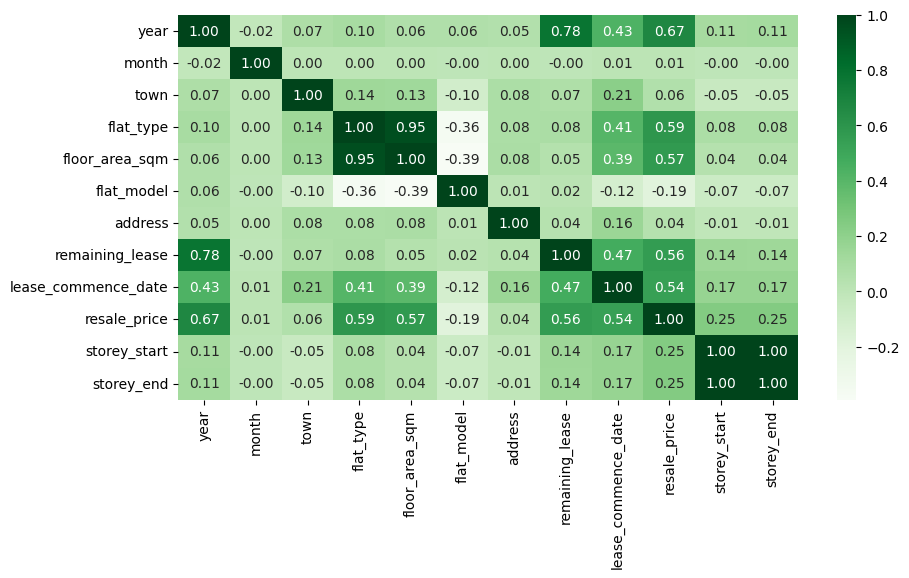

In [ ]:
# Checking the Correlation using heatmap

df_cleaned_corr= df_cleaned.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_cleaned_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [ ]:
df_final= pd.read_csv("ResaleFlatPrices.csv")
df_final.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,remaining_lease,lease_commence_date,resale_price,storey_start,storey_end
0,1990,1,0,0.0,31.0,7.0,3832,0,1977,9000.0,10,12
1,1990,1,0,0.0,31.0,7.0,3832,0,1977,6000.0,4,6


In [ ]:
df_final = pd.read_csv("C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPrices.csv")
df_final.head()

,year,month,town,flat_type,floor_area_sqm,flat_model,address,remaining_lease,lease_commence_date,resale_price,storey_start,storey_end
0,1990,1,0,0.0,31.0,7.0,3832,0,1977,9000.0,10,12
1,1990,1,0,0.0,31.0,7.0,3832,0,1977,6000.0,4,6
2,1990,1,0,0.0,31.0,7.0,3832,0,1977,8000.0,10,12
3,1990,1,0,0.0,31.0,7.0,3832,0,1977,6000.0,7,9
4,1990,1,0,2.0,73.0,20.0,2371,0,1976,47200.0,4,6


In [ ]:
# checking the duplicate values
df_final.duplicated().sum()

1957

In [ ]:
df_final_1= df_final.drop_duplicates()
df_final_1.reset_index(drop= True, inplace= True)

In [ ]:
df_final_1.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,remaining_lease,lease_commence_date,resale_price,storey_start,storey_end
919719,2024,3,26,5.0,146.0,15.0,4648,63,1988,860000.0,4,6
919720,2024,3,26,5.0,142.0,5.0,7250,62,1987,780000.0,7,9


The month,address columns have very low correlation with other features
So I drop the month and address columns

In [ ]:
df_final_2= df_final_1.drop(columns=["month","address"])

In [ ]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

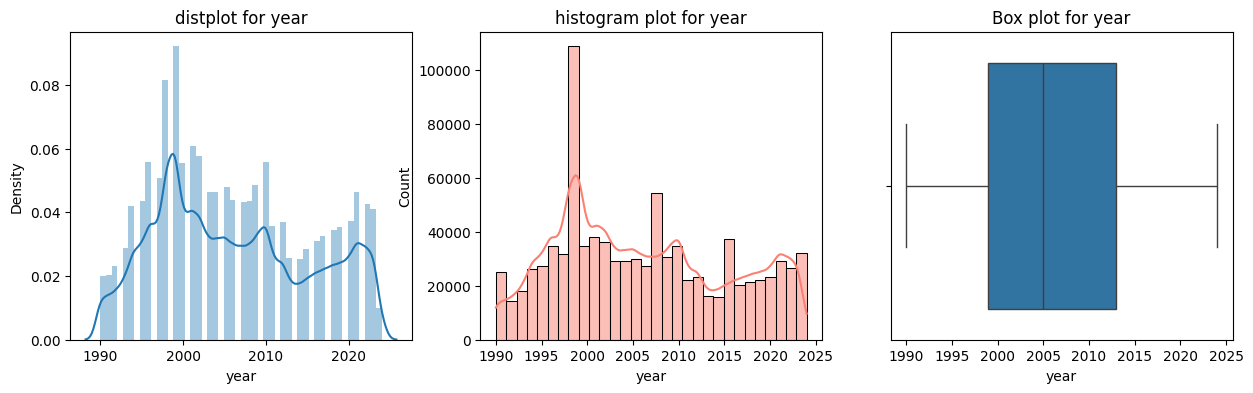

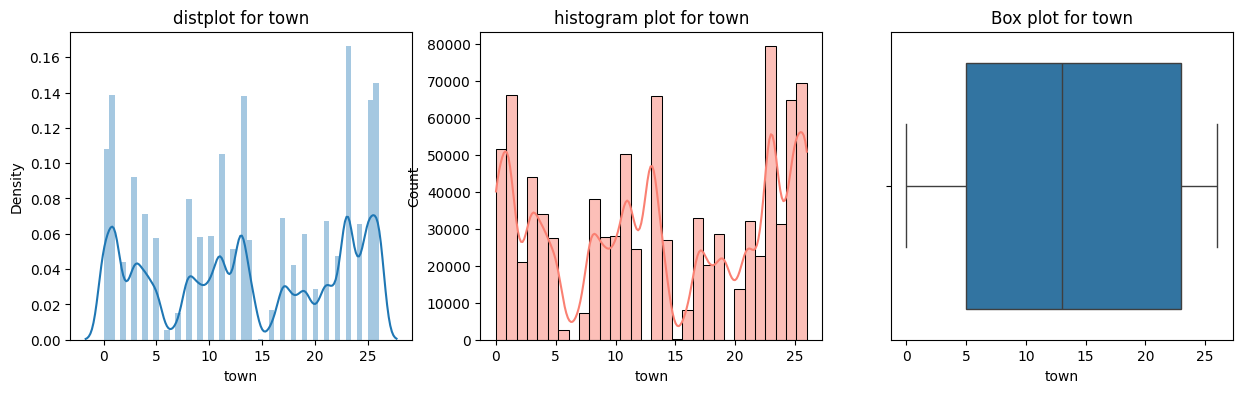

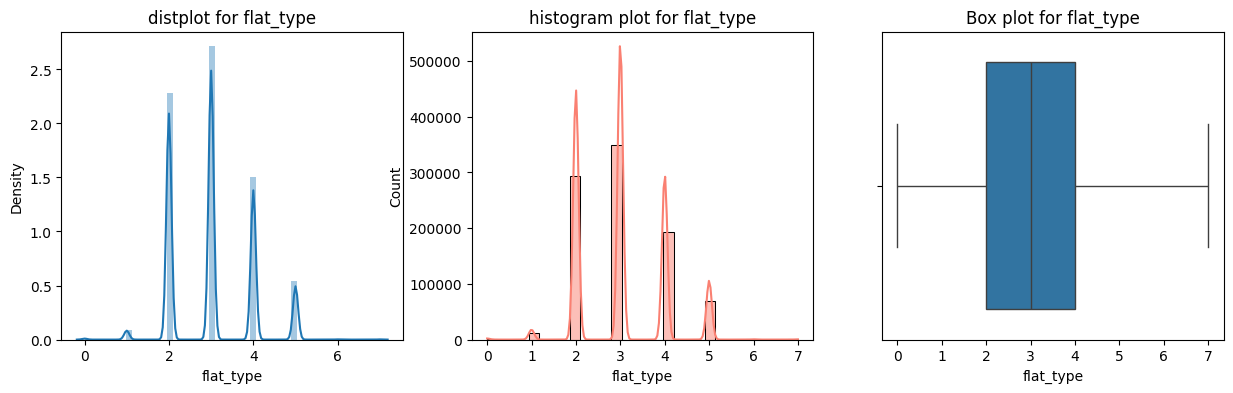

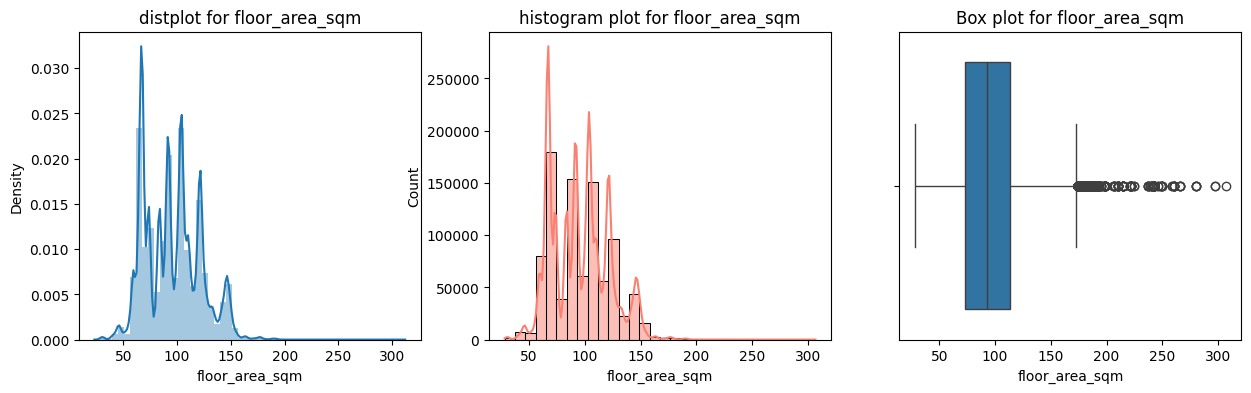

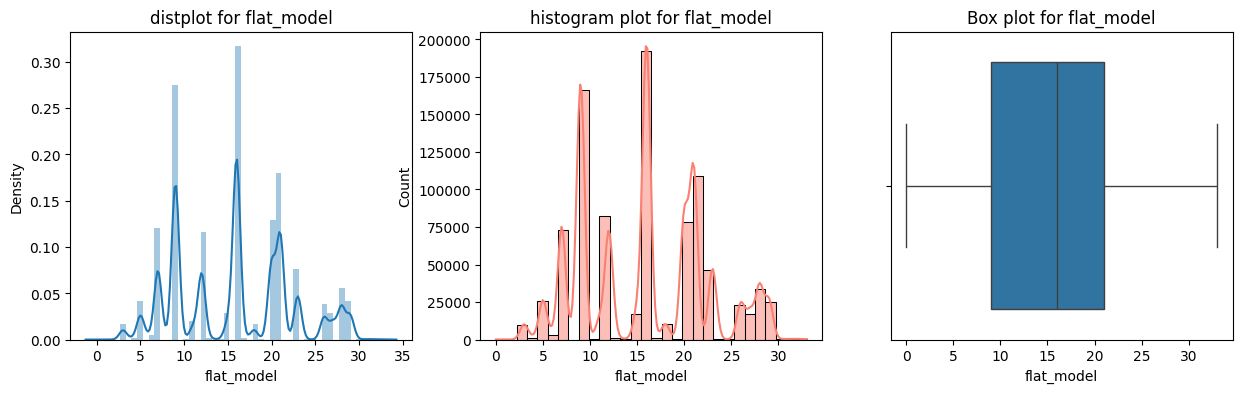

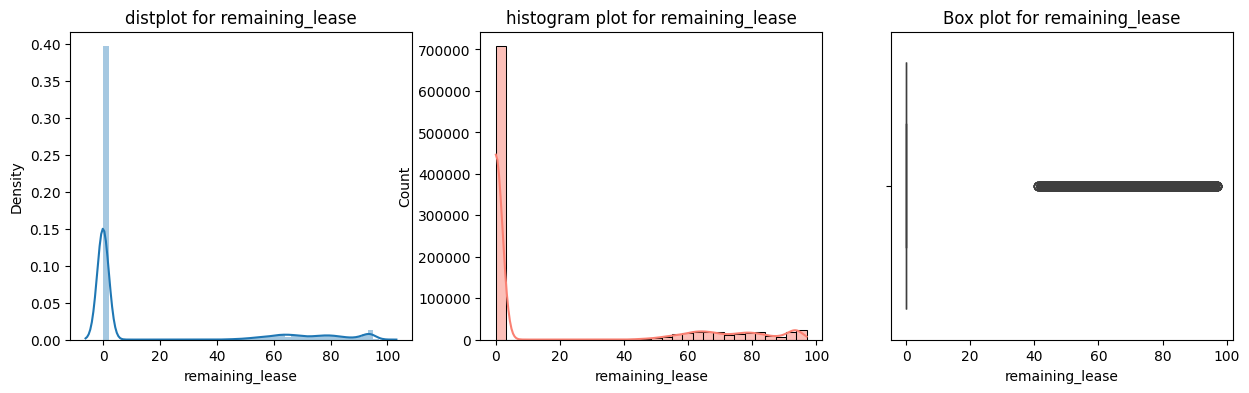

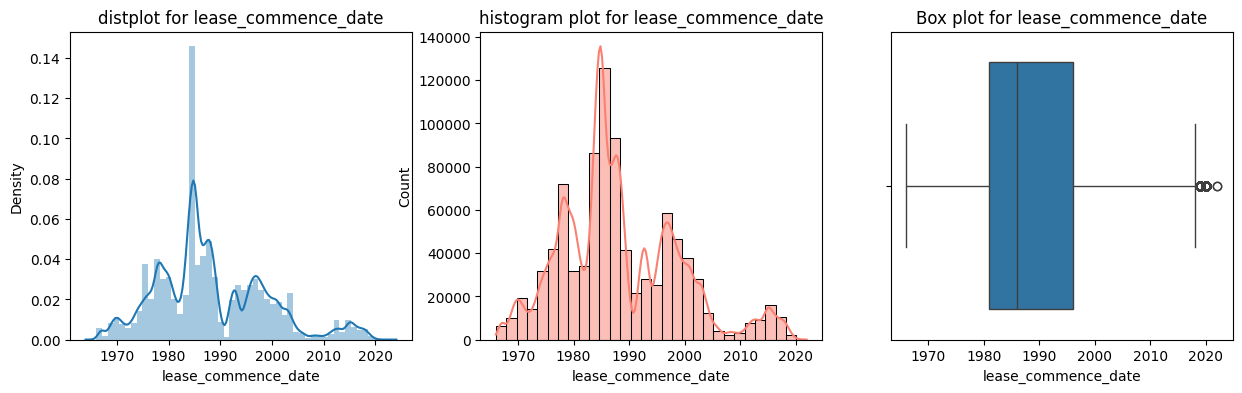

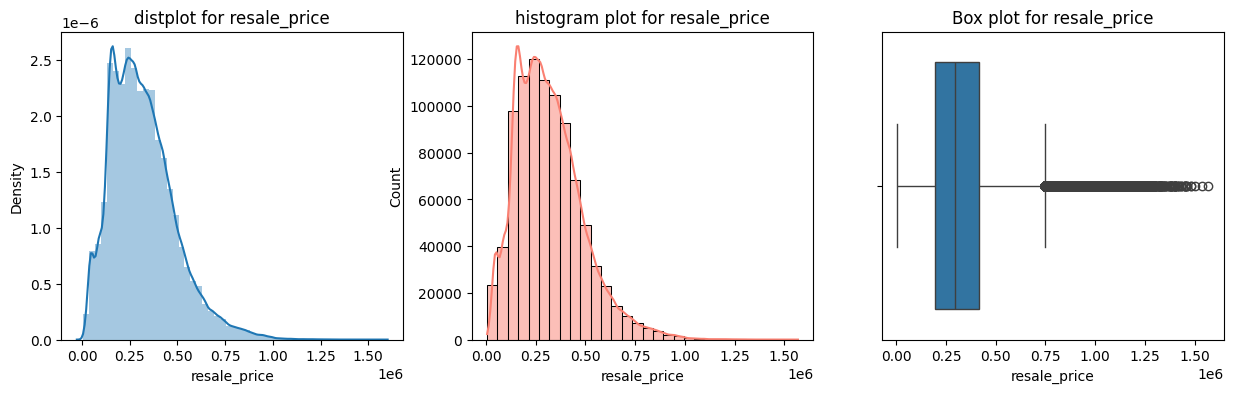

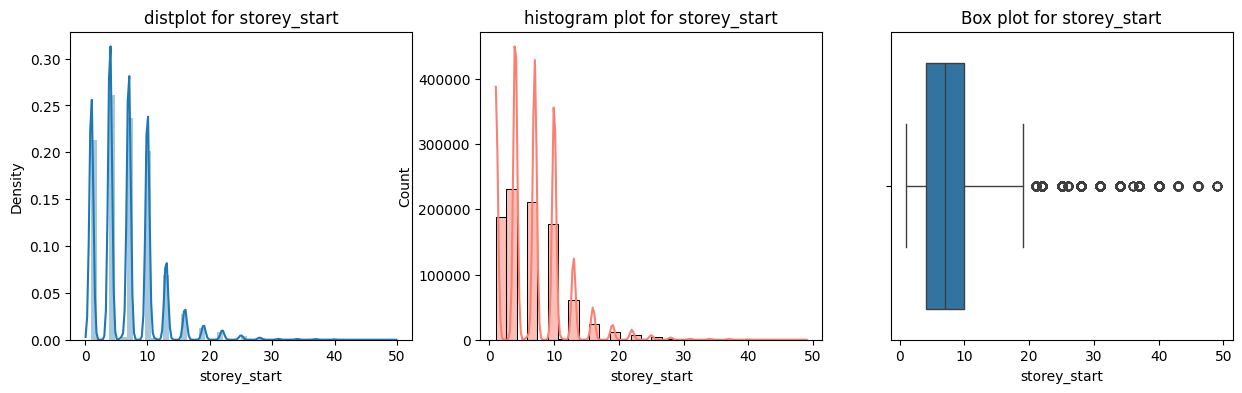

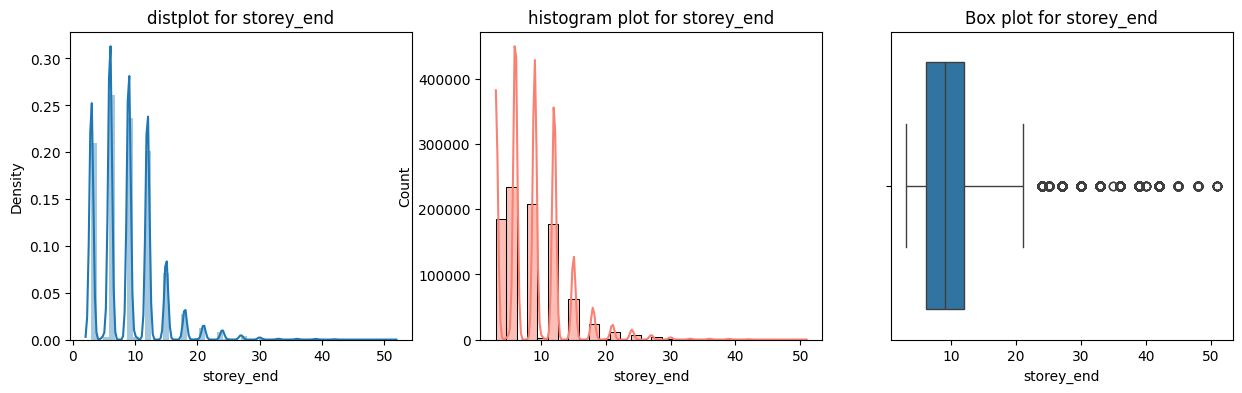

In [ ]:
for i in df_final_2.columns:
    plot(df_final_2,i)

In [ ]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,919721.0,2006.065897,9.245039,1990.0,1999.0,2005.0,2013.0,2024.0
town,919721.0,13.650096,8.797526,0.0,5.0,13.0,23.0,26.0
flat_type,919721.0,3.014810,0.949489,0.0,2.0,3.0,4.0,7.0
floor_area_sqm,919721.0,95.718635,25.833634,28.0,73.0,93.0,113.0,307.0
flat_model,919721.0,15.714167,6.671576,0.0,9.0,16.0,21.0,33.0
remaining_lease,919721.0,17.109459,31.894989,0.0,0.0,0.0,0.0,97.0
lease_commence_date,919721.0,1988.221460,10.599638,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,919721.0,319213.392761,168980.596973,5000.0,193000.0,295000.0,415000.0,1568888.0
storey_start,919721.0,6.676703,4.815739,1.0,4.0,7.0,10.0,49.0
storey_end,919721.0,8.691560,4.815758,3.0,6.0,9.0,12.0,51.0


# Skewness handling

In [ ]:
df_final_3= df_final_2.copy()

The Skewness Columns are
1. storey_start
2. storey_end
3. resale_price
4. floor_area_sqm

In [ ]:
df_final_3["storey_start"]= np.log(df_final_3["storey_start"])
df_final_3["storey_end"]= np.log(df_final_3["storey_end"])
df_final_3["resale_price"]= np.log(df_final_3["resale_price"])
df_final_3["floor_area_sqm"]= np.log(df_final_3["floor_area_sqm"])

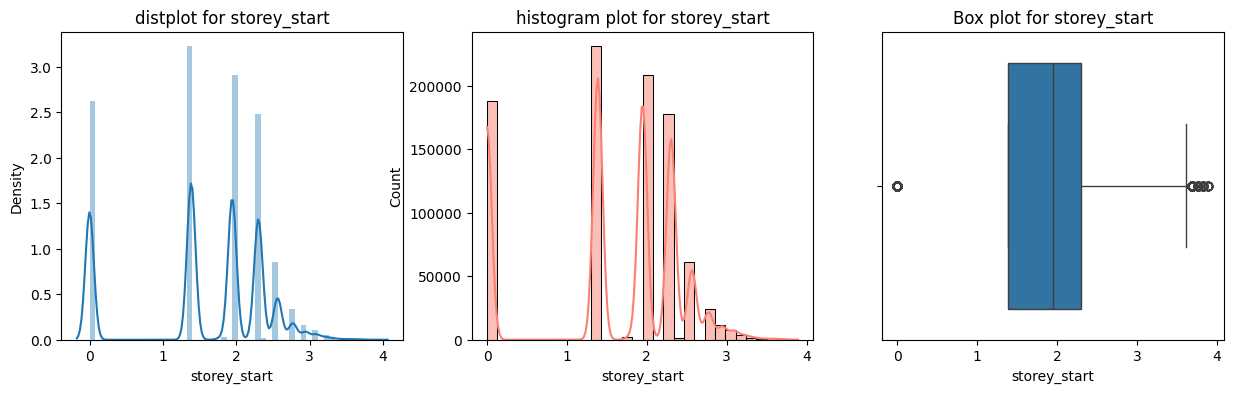

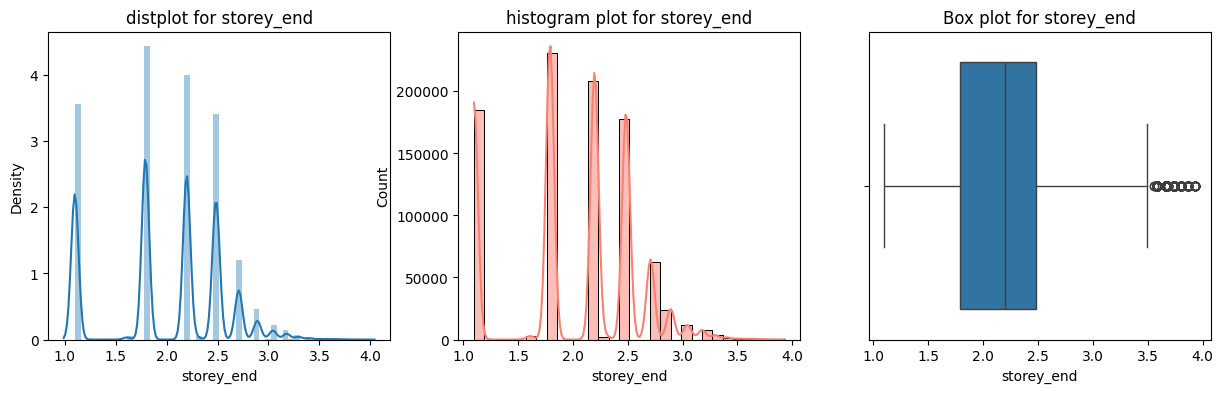

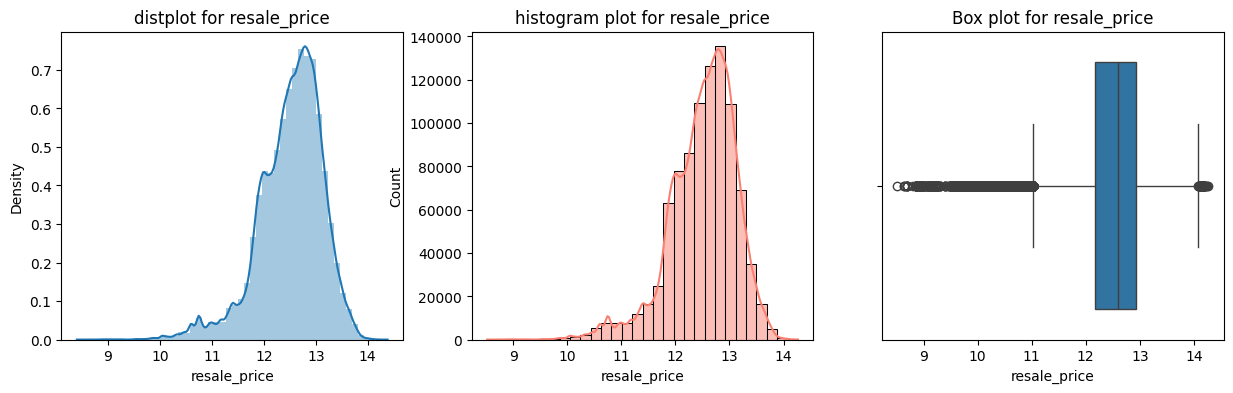

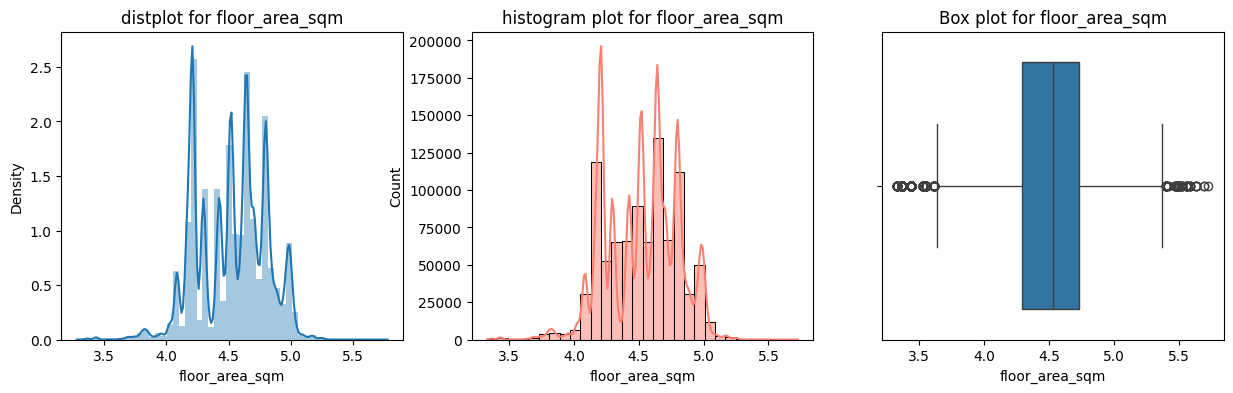

In [ ]:
skewed_columns=["storey_start","storey_end","resale_price","floor_area_sqm"]
for i in skewed_columns:
    plot(df_final_3,i)

# Outliers Handling - Interquartile Range(IQR) Method

In [ ]:
df_final_4= df_final_3.copy()

In [ ]:
# The Outlier Columns are
# 1. floor_area_sqm
# 2. storey_start
# 3. sortey_end
# 4. resale_price
# Recorrect the Outliers

In [ ]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [ ]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [ ]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)

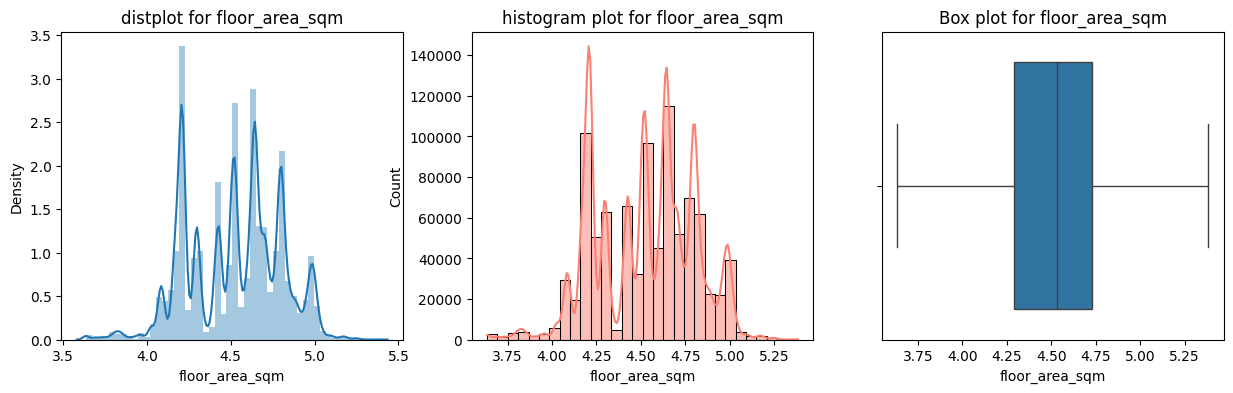

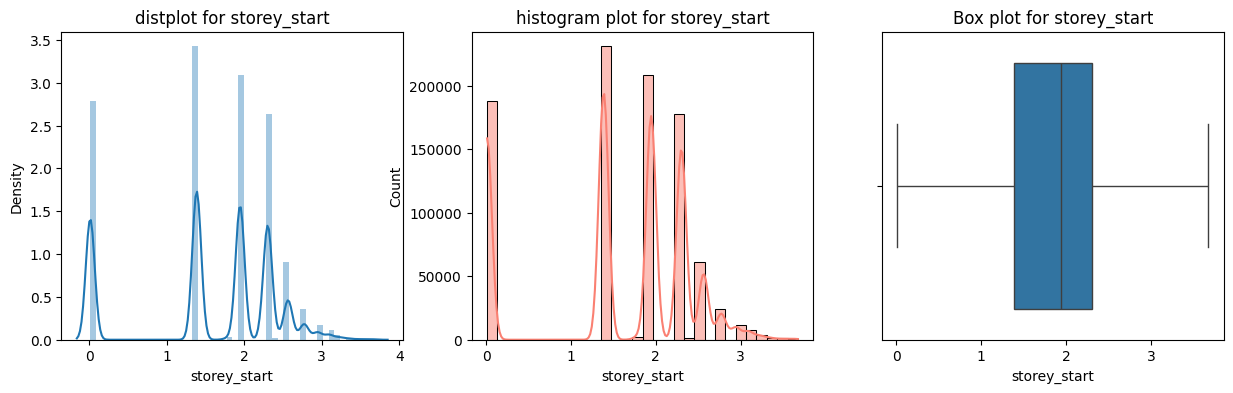

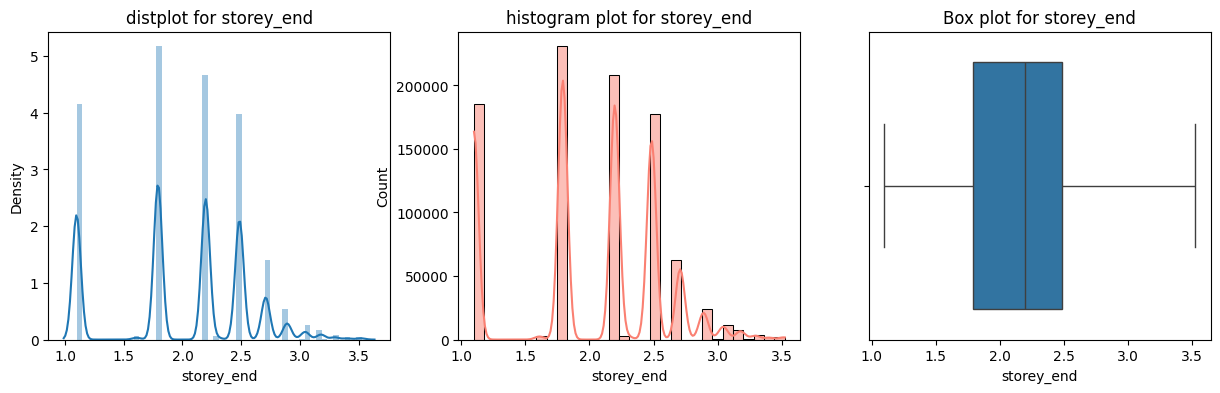

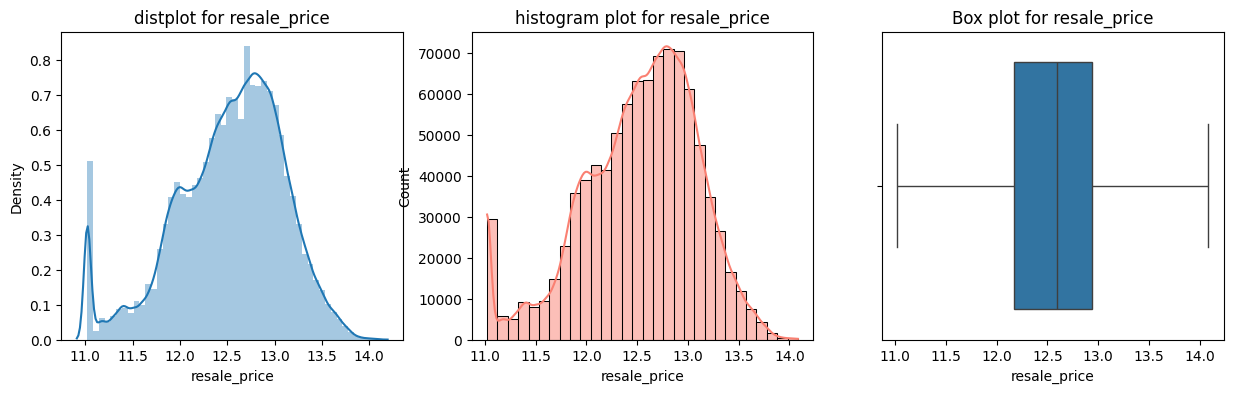

In [ ]:
for k in outlier_columns:
    plot(df_final_4,k)

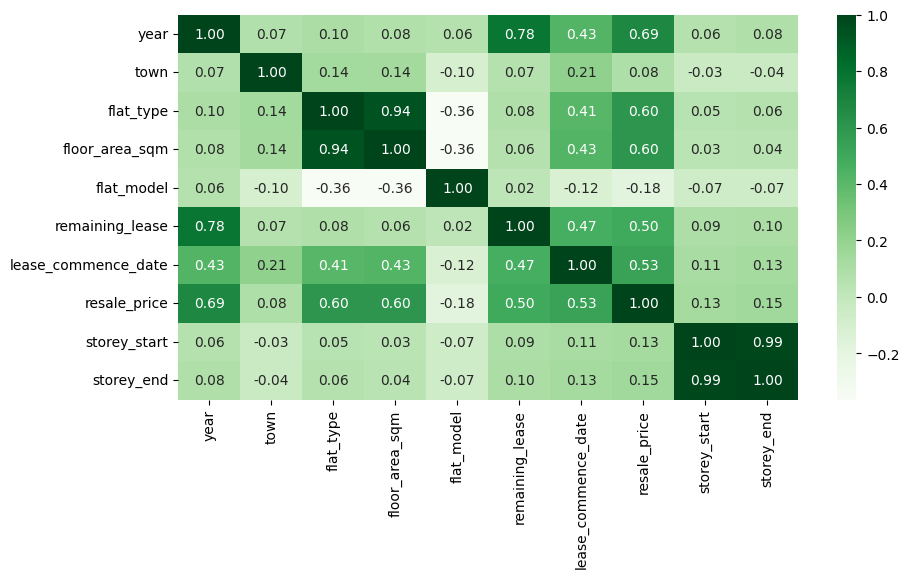

In [ ]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_final_4.corr(), annot= True, cmap="Greens", fmt="0.2f")
plt.show()

# Model Selection (Regression)

In [ ]:
df_final_5= df_final_4.copy()

In [ ]:
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,919721.0,2006.065897,9.245039,1990.000000,1999.000000,2005.000000,2013.000000,2024.000000
town,919721.0,13.650096,8.797526,0.000000,5.000000,13.000000,23.000000,26.000000
flat_type,919721.0,3.014810,0.949489,0.000000,2.000000,3.000000,4.000000,7.000000
floor_area_sqm,919721.0,4.524440,0.275162,3.635067,4.290459,4.532599,4.727388,5.382780
flat_model,919721.0,15.714167,6.671576,0.000000,9.000000,16.000000,21.000000,33.000000
remaining_lease,919721.0,17.109459,31.894989,0.000000,0.000000,0.000000,0.000000,97.000000
lease_commence_date,919721.0,1988.221460,10.599638,1966.000000,1981.000000,1986.000000,1996.000000,2022.000000
resale_price,919721.0,12.526364,0.575083,11.022063,12.170445,12.594731,12.936034,14.084416
storey_start,919721.0,1.574945,0.900648,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,919721.0,2.009006,0.568991,1.098612,1.791759,2.197225,2.484907,3.524627


Calculating the exponential of the maximum resale price could be useful in scenarios where the resale prices are log-transformed for analysis or modeling purposes. Taking the exponential of the maximum resale price would give you the actual maximum resale price in its original scale.

For example, if the resale prices were log-transformed before analysis, taking the exponential of the maximum log-transformed price would give you the maximum resale price in its original scale. This can be helpful for understanding the range of resale prices or for reporting the maximum resale price in a more interpretable format.

In [ ]:
np.exp(14.084416)

1308531.4031306861

In [ ]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 1308531]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,remaining_lease,lease_commence_date,resale_price,storey_start,storey_end
858794,2021,12,2,4.0,120.0,6.0,3318,88,2011,1360000.00,37,39
860071,2021,12,19,4.0,122.0,24.0,9574,93,2016,1328000.00,40,42
861216,2022,1,2,4.0,120.0,6.0,3314,88,2011,1338888.00,34,36
865822,2022,3,7,4.0,105.0,33.0,2006,87,2011,1348888.00,46,48
865823,2022,3,7,4.0,107.0,33.0,2007,87,2011,1388888.88,46,48
...,...,...,...,...,...,...,...,...,...,...,...,...
916220,2024,2,2,5.0,172.0,15.0,3454,67,1992,1480000.00,22,24
916527,2024,2,7,4.0,106.0,33.0,2007,86,2011,1400000.00,31,33
918302,2024,3,2,4.0,120.0,6.0,3318,86,2011,1320000.00,4,6
918433,2024,3,4,4.0,112.0,9.0,9826,90,2016,1450000.00,19,21


In [ ]:
np.exp(11.022063)

61209.825316389695

In [ ]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] <= 61209]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,remaining_lease,lease_commence_date,resale_price,storey_start,storey_end
0,1990,1,0,0.0,31.0,7.0,3832,0,1977,9000.0,10,12
1,1990,1,0,0.0,31.0,7.0,3832,0,1977,6000.0,4,6
2,1990,1,0,0.0,31.0,7.0,3832,0,1977,8000.0,10,12
3,1990,1,0,0.0,31.0,7.0,3832,0,1977,6000.0,7,9
4,1990,1,0,2.0,73.0,20.0,2371,0,1976,47200.0,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
439299,2004,7,4,0.0,31.0,9.0,8287,0,1975,58000.0,7,9
441595,2004,8,4,0.0,31.0,9.0,8287,0,1975,60000.0,1,3
448663,2004,11,4,0.0,31.0,9.0,8287,0,1975,55000.0,10,12
458839,2005,3,4,0.0,31.0,9.0,8287,0,1975,55000.0,7,9


In [ ]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [ ]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [ ]:
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
select_model(df_final_5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.7923128260339204, 'Mean_squared_error': 0.06872619399706655, 'Root_mean_squared_error': 0.26215681184563283, 'Mean_absolute_error': 0.20659812926619117}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.7908644205512507, 'Mean_squared_error': 0.0690045914802642, 'Root_mean_squared_error': 0.2626872503192041, 'Mean_absolute_error': 0.20723095921374468}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9890543114993109, 'Mean_squared_error': 0.0036220605103552774, 'Root_mean_squared_error': 0.06018355681043849, 'Mean_absolute_error': 0.035787465918241286}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9699134628642293, 'Mean_squared_error': 0.009927097099316991, 'Root_mean_squared_error': 0.09963481870971107, 'Mean_absolute_error': 0.06853692748630189}



In [ ]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data of the data (without overfitting)
# so i select the algorithm

#x,y spliting
x= df_final_5.drop(columns=["resale_price"])
y= df_final_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9759467622983666, 'Mean_squared_error': 0.007955453936407312, 'Root_mean_squared_error': 0.08919335141369739, 'Mean_absolute_error': 0.06248551180299794}


In [ ]:
df_final_5.iloc[10500]

year                   1990.000000
town                      1.000000
flat_type                 2.000000
floor_area_sqm            4.094345
flat_model                7.000000
remaining_lease          93.000000
lease_commence_date    1985.000000
resale_price             11.022063
storey_start              1.945910
storey_end                2.197225
Name: 10500, dtype: float64

In [ ]:
np.exp(11.022063)

NameError: name 'np' is not defined

In [ ]:
user_data = np.array([[1990,1,2,4,7,93,1985,1.945910,2.197225]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

11.022734667976643

In [ ]:
np.exp(11.022734667976643)

61250.951806037556

In [ ]:
# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [ ]:
import pickle
import numpy as np

In [ ]:
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [ ]:
user_data = np.array([[1990,1,2,4,7,93,1985,1.945910,2.197225]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

11.022734667976643

In [ ]:
np.exp(11.022734667976643)

61250.951806037556